# Stromverbrauch

In [24]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
%%time
df = pd.read_csv("data/realisierter_stromverbrauch.csv", na_values='-')

Wall time: 58 ms


In [3]:
df.fillna(method='ffill', inplace=True) #replacing '-'(nan-values) with previous value

In [4]:
# convert date to pandas datetime
df.Datum = df.Datum + df.Uhrzeit
df['Datum'] = pd.to_datetime(df['Datum'], format="%m/%d/%Y%H:%M")
df.drop(columns='Uhrzeit', inplace = True)

In [5]:
df.dtypes

Datum           datetime64[ns]
Gesamt                   int64
Residuallast           float64
Pumpspeicher             int64
dtype: object

In [6]:
df.set_index('Datum', inplace=True)

## Data Exploration

In [7]:
df.head()

,Gesamt,Residuallast,Pumpspeicher
Datum,,,
2020-01-01 00:00:00,10964,9363.0,49
2020-01-01 00:15:00,10909,9312.0,65
2020-01-01 00:30:00,10833,9171.0,96
2020-01-01 00:45:00,10788,9065.0,125
2020-01-01 01:00:00,10756,9013.0,95


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gesamt,99456.0,14063.775278,2425.350960,7965.0,12091.0,14020.0,15965.0,20342.0
Residuallast,99456.0,9138.131747,3077.257116,698.0,7096.0,9224.0,11237.0,18039.0
Pumpspeicher,99456.0,368.530878,370.711578,0.0,62.0,250.0,586.0,1992.0


In [9]:
mask = ['2022-10-01 00:00:00','2022-11-01 00:00:00']

<AxesSubplot: xlabel='Datum'>

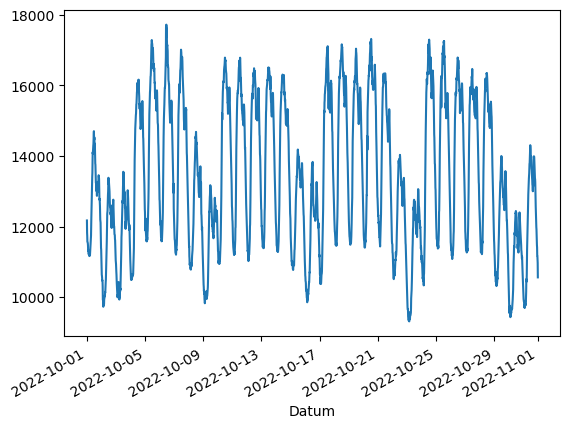

In [10]:
df.loc[mask[0]:mask[1]].Gesamt.plot()

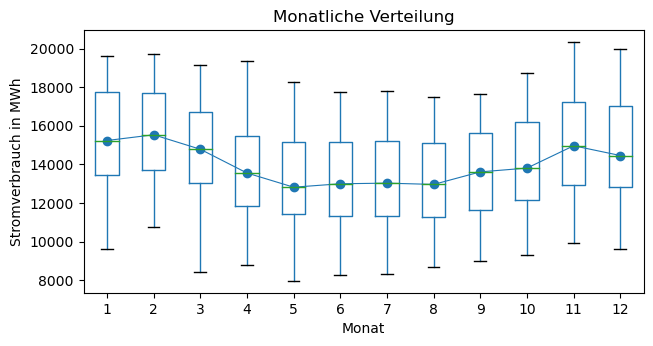

In [11]:
# annual seasonality
fig, ax = plt.subplots(figsize=(7, 3.5))
df['Monat'] = df.index.month
df.boxplot(column='Gesamt', by='Monat', ax=ax,)
df.groupby('Monat')['Gesamt'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Stromverbrauch in MWh')
ax.set_title('Monatliche Verteilung')
fig.suptitle('');

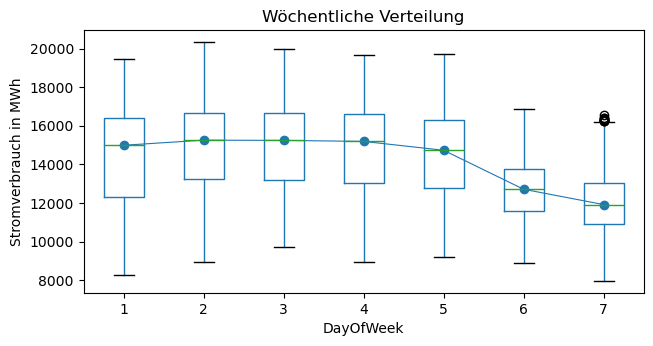

In [12]:
# weekly seasonality
fig, ax = plt.subplots(figsize=(7, 3.5))
df['DayOfWeek'] = df.index.day_of_week + 1
df.boxplot(column='Gesamt', by='DayOfWeek', ax=ax,)
df.groupby('DayOfWeek')['Gesamt'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Stromverbrauch in MWh')
ax.set_title('Wöchentliche Verteilung')
fig.suptitle('');

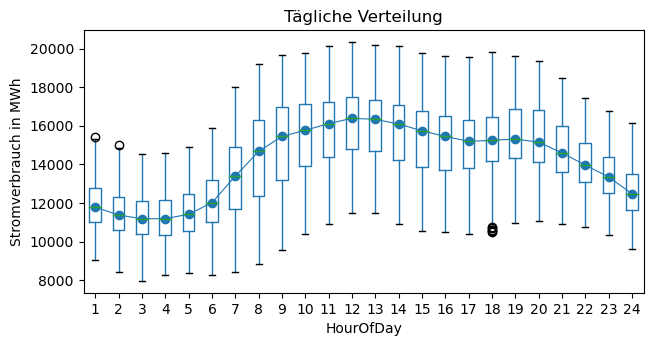

In [13]:
# daily seasonality
fig, ax = plt.subplots(figsize=(7, 3.5))
df['HourOfDay'] = df.index.hour + 1
df.boxplot(column='Gesamt', by='HourOfDay', ax=ax)
df.groupby('HourOfDay')['Gesamt'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Stromverbrauch in MWh')
ax.set_title('Tägliche Verteilung')
fig.suptitle('');

In [14]:
# holidays
import holidays

de_holidays = list(holidays.Germany(years=[2020, 2021, 2022]).keys())
df_hol = pd.DataFrame(
    index=df.index, 
    data={"is_holiday": [date in de_holidays for date in df.index]}
)


df['holiday'] = df_hol['is_holiday']

C:\Users\anato\AppData\Local\Temp\ipykernel_12412\2530239027.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  data={"is_holiday": [date in de_holidays for date in df.index]}


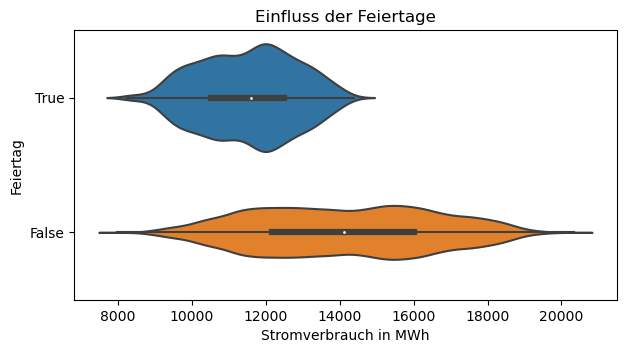

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'Gesamt',
    y       = 'Holiday',
    data    = df.assign(Holiday = df.holiday.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Einfluss der Feiertage')
ax.set_xlabel('Stromverbrauch in MWh')
ax.set_ylabel('Feiertag');

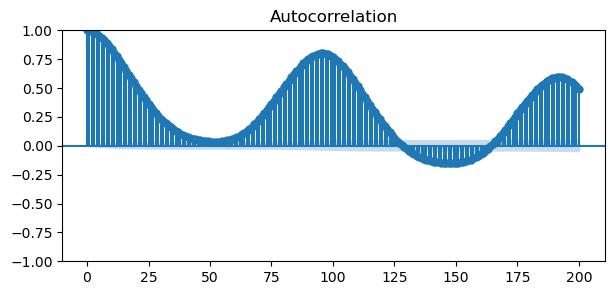

In [27]:
# Autocorrelation
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(df.Gesamt, ax=ax, lags=200)
plt.show()

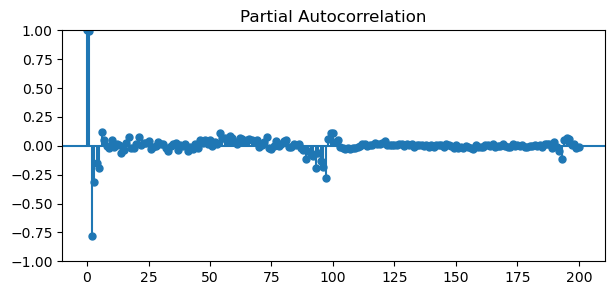

In [29]:
# Partial autocorrelation
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(df.Gesamt, ax=ax, lags=200)
plt.show()